熵在信息论中代表随机变量的不确定度。对于一种数据来说，他越不确定越随机，那么他的信息熵越大

* 熵越大，数据的不确定性越高
* 熵越小，数据的不确定性越低

$H = -\sum_{i=1}^{k}{p_ilog(p_i)}$

对于只有两类的信息熵：
$H = -xlog(x) - (1 - x)log(1 - x)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def entropy(p):
    """只有两类的信息熵"""
    return -p*np.log(p) - (1 - p)*np.log(1 - p)

In [3]:
x = np.linspace(0.01, 0.99, 200)

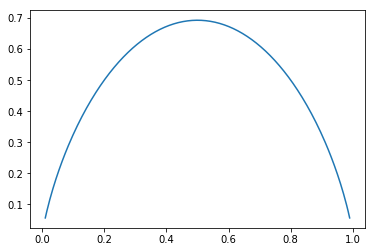

In [4]:
plt.plot(x, entropy(x))
plt.show()

决策树使用信息熵划分问题的目标就是，划分后使得信息熵降低

## 使用信息熵寻找最优划分

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target
dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
def plot_decision_boundary(model, axis):
    """对分类结果进行绘图"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/Charles/Projects/Python/ex-venv/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


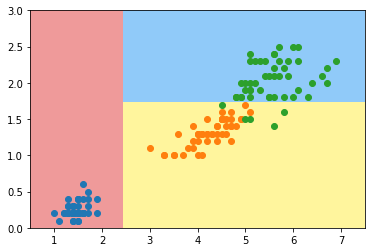

In [22]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()